# DPS AI Challenge

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [2]:
Data_Frame = pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")
Data_Frame

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2022,202206,NaN,48.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2022,202207,NaN,44.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2022,202208,NaN,46.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2022,202209,NaN,54.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2022,202210,NaN,43.0,NaN,NaN,NaN


# Cleaning the DataFrame

In [3]:
# keep the first 5 columns
Data_Frame = Data_Frame.iloc[:,:5]
Data_Frame

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
5,Alkoholunfälle,insgesamt,2022,202206,NaN
6,Alkoholunfälle,insgesamt,2022,202207,NaN
7,Alkoholunfälle,insgesamt,2022,202208,NaN
8,Alkoholunfälle,insgesamt,2022,202209,NaN
9,Alkoholunfälle,insgesamt,2022,202210,NaN


In [5]:
# Rename the columns we will be working on 
Data_Frame = Data_Frame.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRÄGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})
Data_Frame

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
5,Alkoholunfälle,insgesamt,2022,202206,NaN
6,Alkoholunfälle,insgesamt,2022,202207,NaN
7,Alkoholunfälle,insgesamt,2022,202208,NaN
8,Alkoholunfälle,insgesamt,2022,202209,NaN
9,Alkoholunfälle,insgesamt,2022,202210,NaN


In [6]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       2086 non-null   object 
 1   Accident_Type  2086 non-null   object 
 2   Year           2086 non-null   int64  
 3   Month          2086 non-null   object 
 4   Value          2002 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


In [7]:
Data_Frame.describe()

,Year,Value
count,2086.000000,2002.000000
mean,2010.963087,1434.433566
std,6.615227,4634.494223
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2011.000000,394.000000
75%,2017.000000,863.250000
max,2022.000000,46988.000000


In [8]:
Data_Frame.isnull().sum()

Category          0
Accident_Type     0
Year              0
Month             0
Value            84
dtype: int64

The DataFrame has missing values. Let's check them

In [9]:
# Identify rows with NaN
rows_with_nan = Data_Frame[Data_Frame.isnull().any(axis=1)]
print(rows_with_nan)

             Category           Accident_Type  Year   Month  Value
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               insgesamt  2022  202202    NaN
2      Alkoholunfälle               insgesamt  2022  202203    NaN
3      Alkoholunfälle               insgesamt  2022  202204    NaN
4      Alkoholunfälle               insgesamt  2022  202205    NaN
5      Alkoholunfälle               insgesamt  2022  202206    NaN
6      Alkoholunfälle               insgesamt  2022  202207    NaN
7      Alkoholunfälle               insgesamt  2022  202208    NaN
8      Alkoholunfälle               insgesamt  2022  202209    NaN
9      Alkoholunfälle               insgesamt  2022  202210    NaN
10     Alkoholunfälle               insgesamt  2022  202211    NaN
11     Alkoholunfälle               insgesamt  2022  202212    NaN
298    Alkoholunfälle  Verletzte und Getötete  2022  202201    NaN
299    Alkoholunfälle  Verletzte und Getötete  2022  202202   

All the missing values are the rows of 2022. It's not a problem because we are going to drop the records which come after 2020

In [10]:
# without 2021 and 2022
Data_Frame_2020 = Data_Frame.drop(Data_Frame[Data_Frame['Year'] > 2020].index)
Data_Frame_2020

,Category,Accident_Type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
31,Alkoholunfälle,insgesamt,2020,202006,49.0
32,Alkoholunfälle,insgesamt,2020,202007,58.0
33,Alkoholunfälle,insgesamt,2020,202008,46.0
34,Alkoholunfälle,insgesamt,2020,202009,46.0


# Historically number of accidents per category Visualization

In [11]:
# First, we create a dataframe with the number of accidents per year
Accidents = Data_Frame_2020[Data_Frame_2020['Month'] == 'Summe']
Accidents = Accidents[['Category', 'Year', 'Value']]
Accidents

,Category,Year,Value
25,Alkoholunfälle,2020,430.0
38,Alkoholunfälle,2019,434.0
51,Alkoholunfälle,2018,398.0
64,Alkoholunfälle,2017,409.0
77,Alkoholunfälle,2016,301.0
90,Alkoholunfälle,2015,411.0
103,Alkoholunfälle,2014,382.0
116,Alkoholunfälle,2013,377.0
129,Alkoholunfälle,2012,440.0
142,Alkoholunfälle,2011,397.0


In [12]:
# Then, we create a dataframe for each category of accidents
Accidents_Alkoholunfälle = Accidents[Accidents['Category'] == 'Alkoholunfälle']
Accidents_Fluchtunfälle = Accidents[Accidents['Category'] == 'Fluchtunfälle']
Accidents_Verkehrsunfälle = Accidents[Accidents['Category'] == 'Verkehrsunfälle']

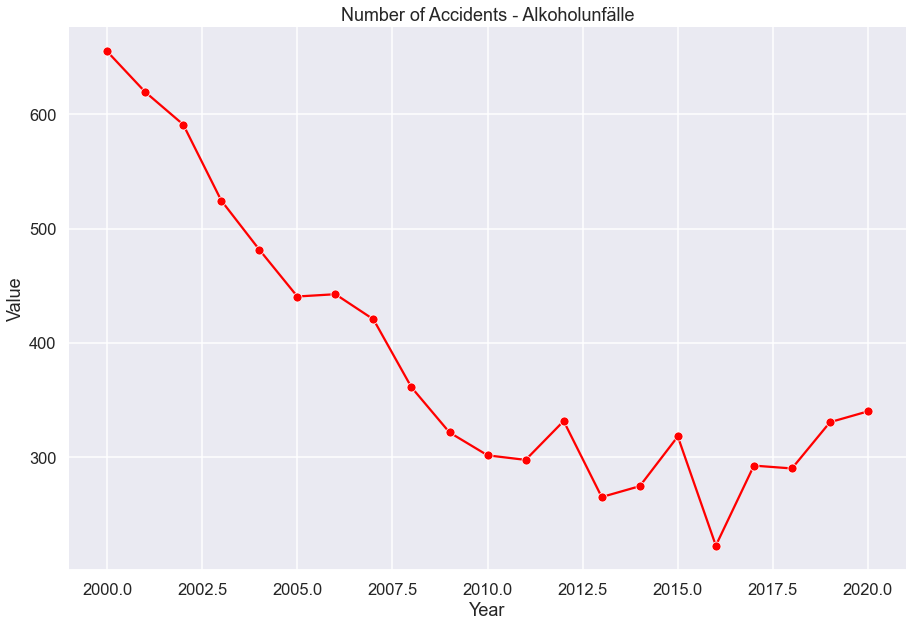

In [14]:
# Finally, we build a grap for each dataframe

plt.figure(figsize=(15,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Alkoholunfälle, color="red", ci=None, markers=True, marker='o')

sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Alkoholunfälle")
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()


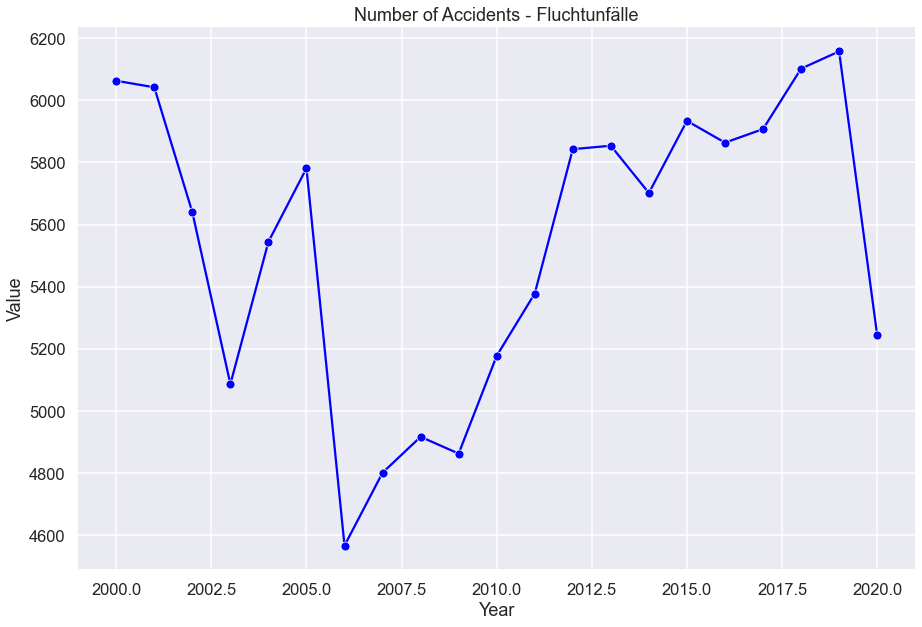

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Fluchtunfälle, color="blue", ci=None, markers=True, marker='o')

sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Fluchtunfälle")
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()

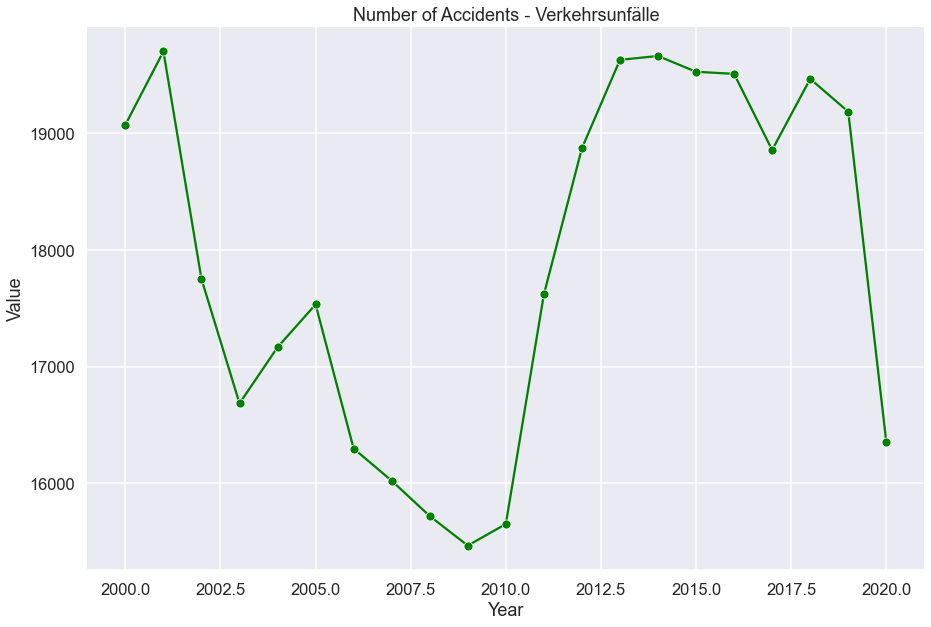

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Verkehrsunfälle, color="green", ci=None, markers=True, marker='o')

sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Verkehrsunfälle")
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()